In [0]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pickle
from math import sqrt
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras.layers import *

In [0]:
def load_data(dataset_path):
  
  #classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprsie', 'Neutral']  
 
  data = []
  test_data = []
  test_labels = []
  labels =[]

  with open(dataset_path, 'r') as file:
      for line_no, line in enumerate(file.readlines()):
          if 0 < line_no <= 35887:
            curr_class, line, set_type = line.split(',')
            image_data = np.asarray([int(x) for x in line.split()]).reshape(48, 48)
            #Creating a list out of the string then converting it into a 2-Dimensional numpy array.
            image_data =image_data.astype(np.uint8)/255.0
            
            if (set_type.strip() == 'PrivateTest'):
              
              test_data.append(image_data)
              test_labels.append(curr_class)
            else:
              data.append(image_data)
              labels.append(curr_class)
      
      test_data = np.expand_dims(test_data, -1)
      test_labels = to_categorical(test_labels, num_classes = 7)
      data = np.expand_dims(data, -1)   
      labels = to_categorical(labels, num_classes = 7)
    
      return np.array(data), np.array(labels), np.array(test_data), np.array(test_labels)
    

In [29]:
dataset_path = "/content/gdrive/My Drive/data/fer2013.csv" 
train_data, train_labels, test_data, test_labels = load_data(dataset_path)

print("Number of images in Training set:", len(train_data))
print("Number of images in Test set:", len(test_data))

Number of images in Training set: 32298
Number of images in Test set: 3589


In [30]:
# 0.1 of train data
x_val = train_data[:3200]
y_val = train_labels[:3200]
x_val.shape

(3200, 48, 48, 1)

In [33]:
model = tf.keras.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='elu', padding="same", input_shape=(48,48,1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), activation='elu', padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(128, (3, 3), activation='elu', padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(256, (3, 3), activation='elu', padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='elu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(7 , activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
batch_normalization_8 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_9 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 12, 12, 64)       

In [0]:
batch_size = 32
epochs = 50

callback = tf.keras.callbacks.EarlyStopping(monitor='acc', patience=2)
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),
             loss=tf.keras.losses.categorical_crossentropy,
             metrics=['accuracy'])

In [35]:
history = model.fit(train_data, train_labels, 
                    batch_size=batch_size,
                    callbacks=[callback],
                    validation_data=(x_val, y_val),
                    epochs = epochs)

Train on 32298 samples, validate on 3200 samples
Epoch 1/50
32298/32298 [==============================] - 8s 238us/sample - loss: 1.9534 - acc: 0.2541 - val_loss: 1.6821 - val_acc: 0.3753
Epoch 2/50
32298/32298 [==============================] - 7s 214us/sample - loss: 1.7235 - acc: 0.3363 - val_loss: 1.5485 - val_acc: 0.4256
Epoch 3/50
32298/32298 [==============================] - 7s 214us/sample - loss: 1.6139 - acc: 0.3781 - val_loss: 1.5259 - val_acc: 0.4462
Epoch 4/50
32298/32298 [==============================] - 7s 215us/sample - loss: 1.5410 - acc: 0.4072 - val_loss: 1.4001 - val_acc: 0.4784
Epoch 5/50
32298/32298 [==============================] - 7s 213us/sample - loss: 1.4750 - acc: 0.4333 - val_loss: 1.3043 - val_acc: 0.5113
Epoch 6/50
32298/32298 [==============================] - 7s 215us/sample - loss: 1.4134 - acc: 0.4580 - val_loss: 1.2430 - val_acc: 0.5319
Epoch 7/50
32298/32298 [==============================] - 7s 215us/sample - loss: 1.3691 - acc: 0.4742 - val_lo

In [36]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

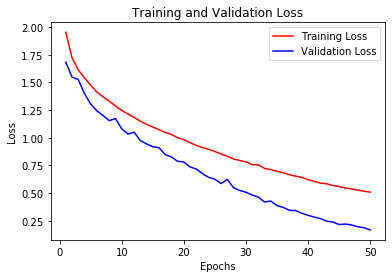

In [37]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

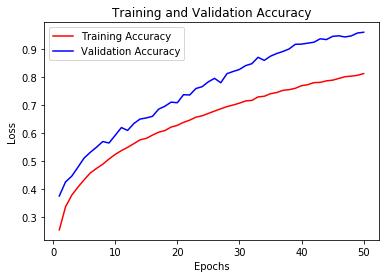

In [38]:
plt.clf() #clear previous plot

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [39]:
test_loss, test_acc = model.evaluate(test_data, test_labels, batch_size=32)
print('test acc: ', test_acc)

3589/3589 [==============================] - 0s 92us/sample - loss: 1.1783 - acc: 0.6358
test acc:  0.6358317


In [0]:
model.save("/content/gdrive/My Drive/data/emotion_2.h5")